In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/janatahack-healthcare-analytics-part-2/train_data_dict.csv
/kaggle/input/janatahack-healthcare-analytics-part-2/sample_submission.csv
/kaggle/input/janatahack-healthcare-analytics-part-2/test.csv
/kaggle/input/janatahack-healthcare-analytics-part-2/train.csv


In [28]:
train_file = '/kaggle/input/janatahack-healthcare-analytics-part-2/train.csv'
test_file = '/kaggle/input/janatahack-healthcare-analytics-part-2/test.csv'

In [29]:
!cat /kaggle/input/janatahack-healthcare-analytics-part-2/train_data_dict.csv

Column,Description
case_id,Case_ID registered in Hospital
Hospital_code,Unique code for the Hospital
Hospital_type_code,Unique code for the type of Hospital
City_Code_Hospital,City Code of the Hospital
Hospital_region_code,Region Code of the Hospital
Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
Department,Department overlooking the case
Ward_Type,Code for the Ward type
Ward_Facility_Code,Code for the Ward Facility
Bed Grade,Condition of Bed in the Ward
patientid,Unique Patient Id
City_Code_Patient,City Code for the patient
Type of Admission,Admission Type registered by the Hospital
Severity of Illness,Severity of the illness recorded at the time of admission
Visitors with Patient,Number of Visitors with the patient
Age,Age of the patient
Admission_Deposit,Deposit at the Admission Time
Stay,Stay Days by the patient


In [30]:
df, tdf = pd.read_csv(train_file), pd.read_csv(test_file)

In [31]:
df.head(), tdf.head()

(   case_id  Hospital_code Hospital_type_code  City_Code_Hospital  \
 0        1              8                  c                   3   
 1        2              2                  c                   5   
 2        3             10                  e                   1   
 3        4             26                  b                   2   
 4        5             26                  b                   2   
 
   Hospital_region_code  Available Extra Rooms in Hospital    Department  \
 0                    Z                                  3  radiotherapy   
 1                    Z                                  2  radiotherapy   
 2                    X                                  2    anesthesia   
 3                    Y                                  2  radiotherapy   
 4                    Y                                  2  radiotherapy   
 
   Ward_Type Ward_Facility_Code  Bed Grade  patientid  City_Code_Patient  \
 0         R                  F        2.0      31

In [32]:
df.columns, tdf.columns, len(df.columns)

(Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
        'Hospital_region_code', 'Available Extra Rooms in Hospital',
        'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
        'patientid', 'City_Code_Patient', 'Type of Admission',
        'Severity of Illness', 'Visitors with Patient', 'Age',
        'Admission_Deposit', 'Stay'],
       dtype='object'),
 Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
        'Hospital_region_code', 'Available Extra Rooms in Hospital',
        'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
        'patientid', 'City_Code_Patient', 'Type of Admission',
        'Severity of Illness', 'Visitors with Patient', 'Age',
        'Admission_Deposit'],
       dtype='object'),
 18)

In [33]:
df.case_id.describe()

count    318438.000000
mean     159219.500000
std       91925.276847
min           1.000000
25%       79610.250000
50%      159219.500000
75%      238828.750000
max      318438.000000
Name: case_id, dtype: float64

In [34]:
for col in df.columns:
#     if (col == 'Stay'): continue
    print(df[col].value_counts(normalize=True, dropna=False, ascending=True))
    print(df[col].nunique())
    

2049      0.000003
19875     0.000003
17826     0.000003
23969     0.000003
21920     0.000003
            ...   
19036     0.000003
29275     0.000003
31322     0.000003
107105    0.000003
2047      0.000003
Name: case_id, Length: 318438, dtype: float64
318438
4     0.003894
7     0.004101
20    0.004412
18    0.011399
8     0.011503
16    0.011528
31    0.012458
22    0.013431
30    0.015708
2     0.016022
13    0.016443
1     0.016484
5     0.016521
17    0.017275
3     0.022347
24    0.025098
21    0.025594
15    0.029070
10    0.029629
25    0.030882
32    0.033611
12    0.035476
29    0.035520
9     0.036145
27    0.044731
28    0.053816
14    0.054416
11    0.054416
6     0.064141
19    0.066635
23    0.083426
26    0.103870
Name: Hospital_code, dtype: float64
32
g    0.013431
f    0.033611
d    0.064028
e    0.077786
c    0.144229
b    0.216513
a    0.450402
Name: Hospital_type_code, dtype: float64
7
13    0.011399
10    0.016484
4     0.043516
11    0.053816
9     0.082518
5  

In [35]:
# 'Hospital_code' category
# 'Hospital_type_code' category, 'City_Code_Hospital'  category,
#         'Hospital_region_code' category, 'Available Extra Rooms in Hospital' category,
#         'Department'category, 'Ward_Type'category, 'Ward_Facility_Code'category, 'Bed Grade' category,
#         'patientid' , 'City_Code_Patient' category, 'Type of Admission'  category,
#         'Severity of Illness' category, 'Visitors with Patient'   category, 'Age' category,
#         'Admission_Deposit' regression  , 'Stay regression

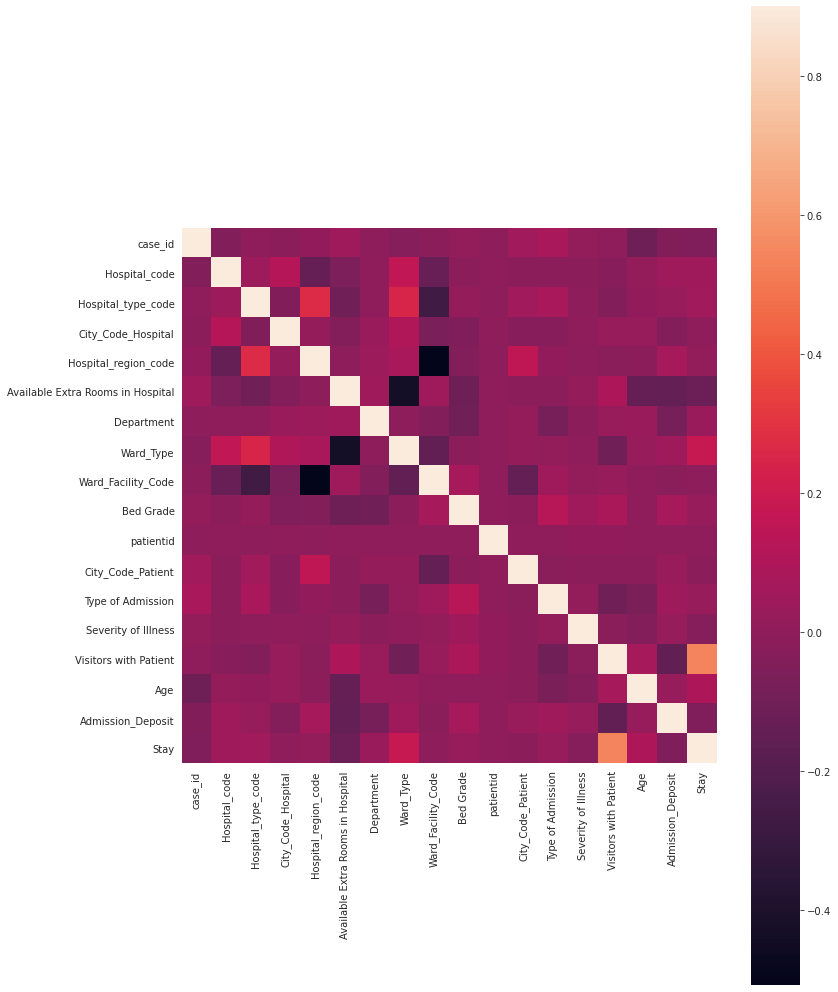

In [52]:
cat_cols = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'Available Extra Rooms in Hospital','Department', 
            'Ward_Type', 'Ward_Facility_Code', 'Bed Grade', 'patientid' , 'City_Code_Patient', 'Type of Admission' , 'Severity of Illness', 
            'Visitors with Patient', 'Age', 'Stay']
for col in cat_cols:
    df[col] = df[col].astype('category').cat.codes
    
# print(df.columns)
corrmat = df.corr()
# corrmat = df[df.columns[1:]].corr()['Stay'][:]
plt.subplots(figsize=(12,18))
sns.heatmap(corrmat, vmax=0.9, square=True)
# print(corrmat)

In [53]:
df.describe()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
count,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.00000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000
mean,159219.500000,17.318841,1.256841,3.596100,0.778098,3.197527,1.943779,1.888575,3.286913,2.624875,46039.09811,7.106017,0.782768,1.374076,3.283845,4.127777,4880.749392,2.698550
std,91925.276847,8.633755,1.535712,2.806699,0.752527,1.166844,0.561245,0.804655,1.688050,0.874391,26565.22576,4.652382,0.688957,0.768377,1.760373,1.889567,1086.776254,2.150075
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1800.000000,0.000000
25%,79610.250000,10.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,22984.00000,4.000000,0.000000,1.000000,2.000000,3.000000,4186.000000,1.000000
50%,159219.500000,18.000000,1.000000,4.000000,1.000000,3.000000,2.000000,2.000000,4.000000,3.000000,46039.50000,8.000000,1.000000,2.000000,3.000000,4.000000,4741.000000,2.000000
75%,238828.750000,25.000000,2.000000,6.000000,1.000000,4.000000,2.000000,2.000000,5.000000,3.000000,68981.00000,8.000000,1.000000,2.000000,4.000000,5.000000,5409.000000,3.000000
max,318438.000000,31.000000,6.000000,10.000000,2.000000,17.000000,4.000000,5.000000,5.000000,4.000000,92016.00000,37.000000,2.000000,2.000000,27.000000,9.000000,11008.000000,10.000000


In [48]:
set(df.columns) - set(cat_cols)

0    c
1    c
2    e
3    b
4    b
Name: Hospital_type_code, dtype: object